# Example notebook for connectome model building
### ▶️ Related ticket: __[SSCXDIS-530](https://bbpteam.epfl.ch/project/issues/browse/SSCXDIS-530)__
This is an example notebook demonstrating model building on a toy data set, which
 - loads connectome data
 - creates a data-based model
 - visualizes data vs. model

> **NOTE:** Modelling code is based on the `model_building` pipeline from the [connectome_manipulator](https://bbpgitlab.epfl.ch/conn/structural/connectome_manipulator) package (v0.0.1.dev0)!

### How to build model

In [1]:
# Global imports
import numpy as np
import pandas as pd
import scipy.sparse as sps
import sys

# Local imports
sys.path.append('../../library')
import modelling

In [2]:
# Load example data (adjacency matrix & neuron properties table)
adj_file = './adj_r0c10.npz'
nrn_file = './nodes_r0c10.h5'
adj_matrix = sps.load_npz(adj_file)
nrn_table = pd.read_hdf(nrn_file)
assert adj_matrix.shape[0] == adj_matrix.shape[1] == nrn_table.shape[0], 'ERROR: Data size mismatch!'
print(f'INFO: Loaded connectivity and properties of {nrn_table.shape[0]} neurons')

INFO: Loaded connectivity and properties of 6719 neurons


In [3]:
# Configure model building
config_dict = {'model_name': 'ConnProb2ndOrder',  # Name of the model (to be used in file names, ...)
               'model_order': 2,                  # Model order
               'bin_size_um': 100,                # Bin size (um) for depth binning
               'max_range_um': 1000,              # Max. distance (um) range to consider (None to use full distance range)
               'sample_size': 1000,               # Size of random subset of neurons to consider (0 or None to disable subsampling)
               'sample_seed': 4321,               # Seed for selecting random subset of neurons
               'model_dir': './modelling/models', # Output directory where to save the model (None to disable saving)
               'data_dir': './modelling/data',    # Output directory where to save the extracted data (None to disable saving)
               'do_plot': True,                  # Enable/disable output plotting
               'plot_dir': './modelling/figs'}    # Output directory where to save the plots (None to disable saving)

INFO: Running order-2 model building {'bin_size_um': 100, 'max_range_um': 1000, 'sample_size': 1000, 'sample_seed': 4321, 'model_dir': './modelling/models', 'data_dir': './modelling/data', 'do_plot': True, 'plot_dir': './modelling/figs'}...
INFO: Subsampling to 1000 of 6719 neurons
Extracting 1-dimensional (10) connection probabilities...


INFO: Pickled dict written to ./modelling/data/ConnProb2ndOrder__data.pickle
MODEL FIT: f(x) = 0.085 * exp(-0.005 * x)
INFO: Pickled dict written to ./modelling/models/ConnProb2ndOrder__model.pickle


INFO: Figure saved to /gpfs/bbp.cscs.ch/home/pokorny/JupyterLab/git/connectome_analysis/documentation/notebooks/modelling/figs/ConnProb2ndOrder__data_vs_model.png
INFO: Figure saved to /gpfs/bbp.cscs.ch/home/pokorny/JupyterLab/git/connectome_analysis/documentation/notebooks/modelling/figs/ConnProb2ndOrder__data_counts.png


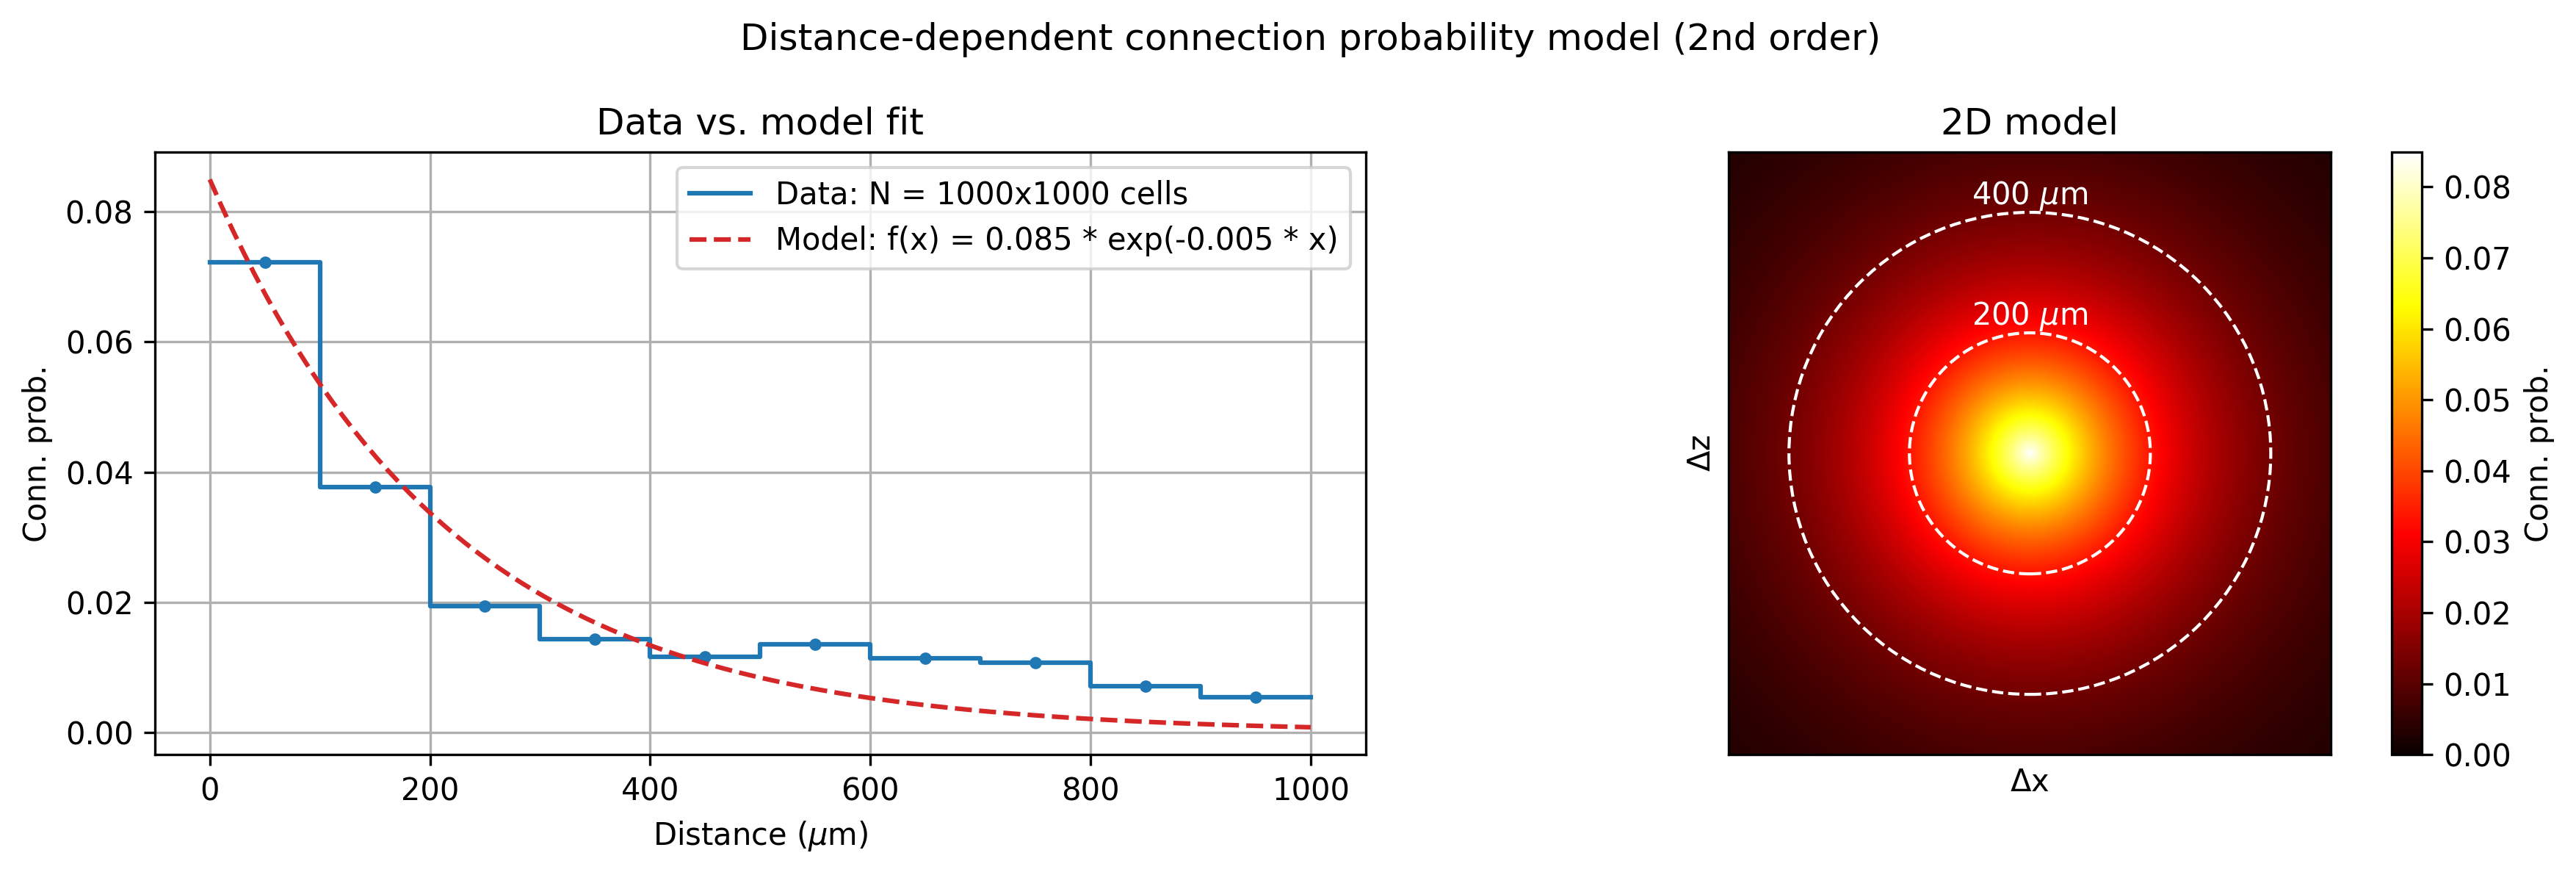

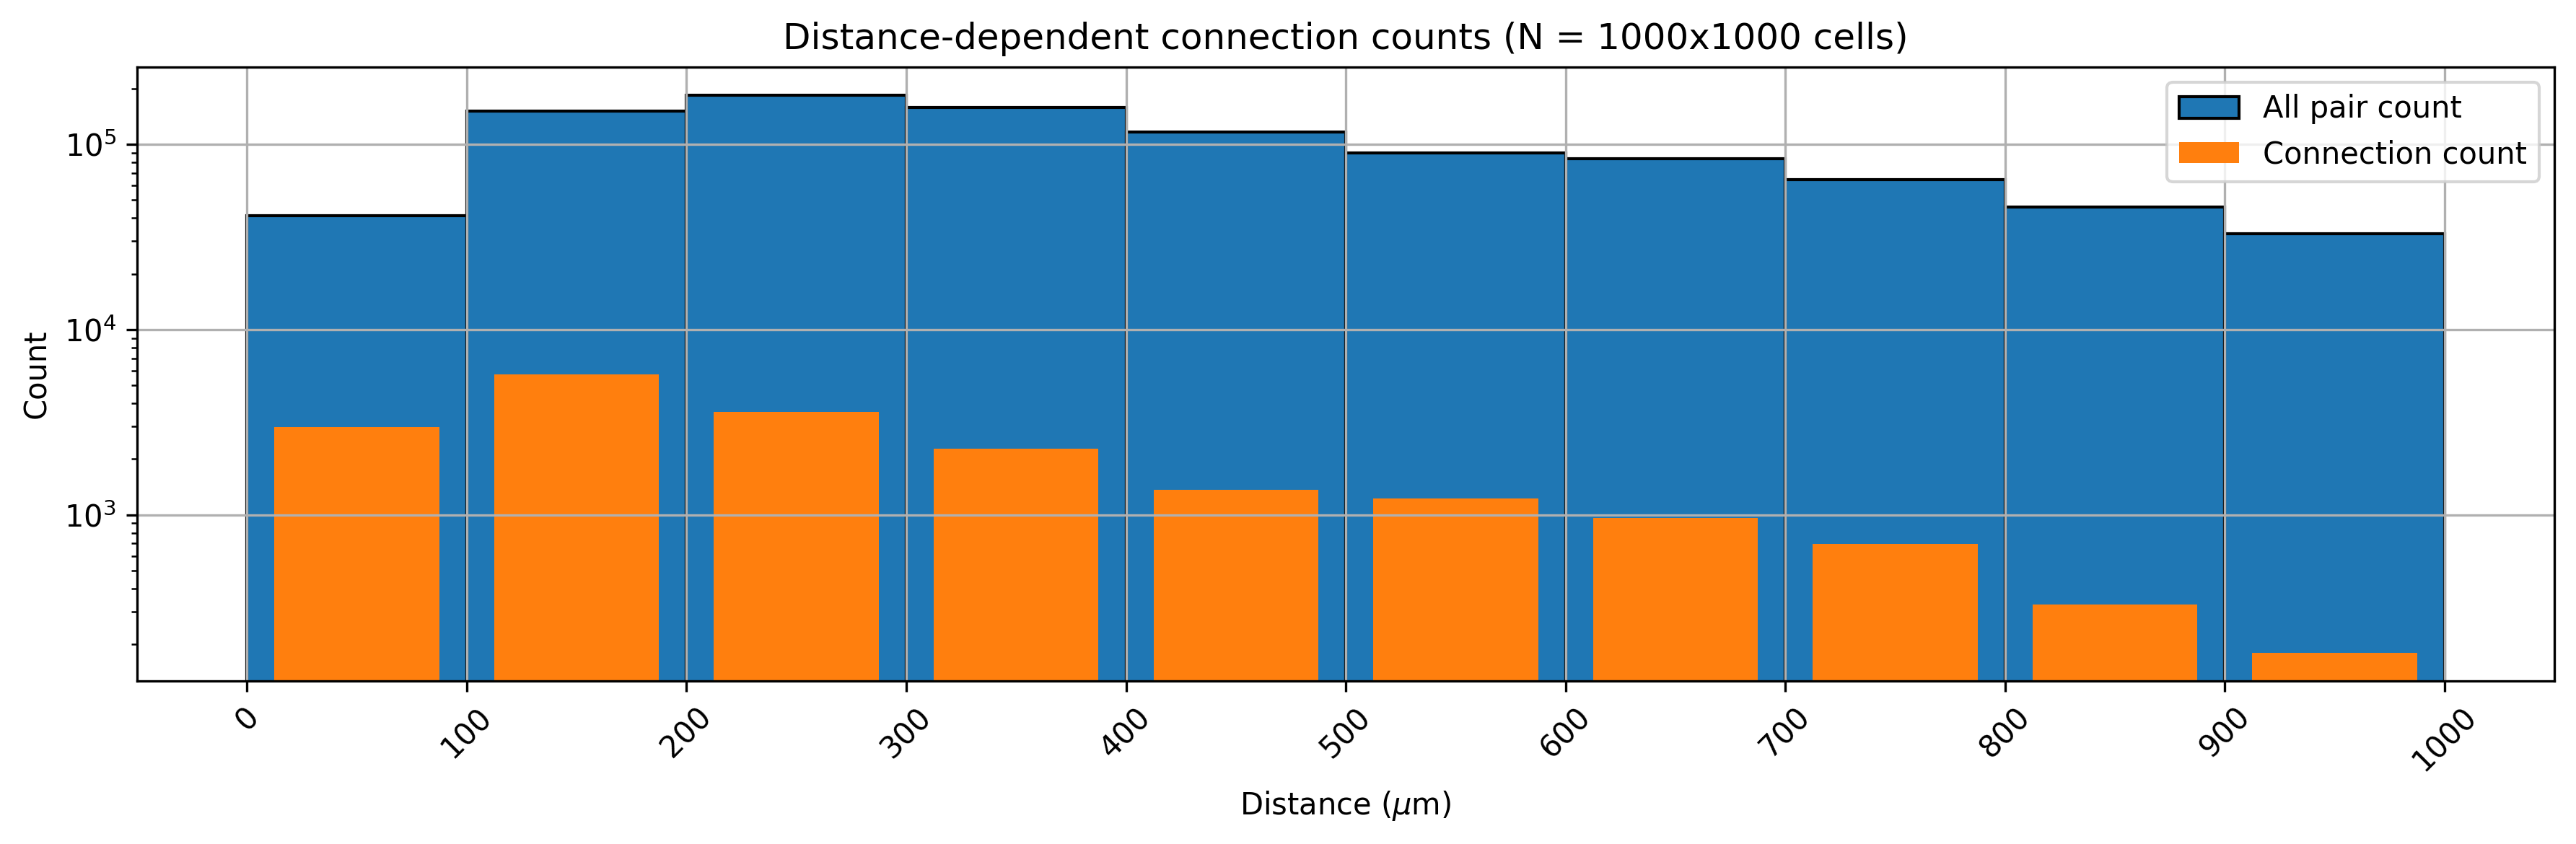

In [4]:
# Run 2nd order model building
data_dict, model_dict = modelling.run_model_building(adj_matrix, nrn_table, **config_dict)

### How to access existing model

In [1]:
# Global imports
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import sys

# Local imports
sys.path.append('../../library')
import modelling

In [2]:
# Specify model file
model_file = './modelling/models/ConnProb2ndOrder__model.pickle'

In [3]:
# Load model
with open(model_file, 'rb') as f:
    model_dict = pickle.load(f)
p_model = modelling.get_model_function(**model_dict) # Probability function
print(f'INFO: Loaded model function with {len(model_dict["model_inputs"])} input(s) {model_dict["model_inputs"]}')

INFO: Loaded model function with 1 input(s) ['d']


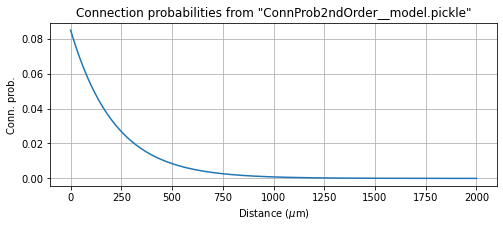

In [4]:
# Acces probabilities from model
d = np.arange(0, 2001, 10) # Distance in um
plt.figure(figsize=(8, 3))
plt.plot(d, p_model(d))
plt.grid()
plt.xlabel('Distance ($\mu$m)')
plt.ylabel('Conn. prob.')
plt.title(f'Connection probabilities from "{os.path.split(model_file)[-1]}"')
plt.show()